# LamaH Dataset Analysis

Comprehensive data analysis workflow following best practices in data quality assessment and preprocessing.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Add src to the Python path
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.analyze.loader import load_random_files
from src.analyze.inspection import (
    perform_initial_inspection,
    analyze_null_values,
    detect_outliers
)
from src.analyze.plotting import (
    plot_time_series,
    plot_histogram,
    plot_correlation_heatmap,
    plot_missing_values,
    plot_distribution_grid,
    plot_boxplot_grid
)
from src.analyze.quality import (
    assess_data_quality,
    check_data_consistency,
    generate_data_quality_summary
)
from src.analyze.preprocessing import (
    impute_missing_values,
    normalize_data,
    remove_outliers,
    handle_duplicates,
    create_preprocessing_pipeline
)

## Step 1: Data Loading

Load 100 random location files from the dataset.
Using a seed ensures reproducibility.

In [2]:
DATA_PATH = os.path.join('data', 'D_gauges', '2_timeseries', 'daily')
SEED = 42

df_raw = load_random_files(DATA_PATH, num_files=100, seed=SEED)
print(f"\nLoaded data shape: {df_raw.shape}")
df_raw.head()

Found 882 CSV files.
Loading 100 random files...
All selected data loaded and concatenated.

Loaded data shape: (1245564, 8)


,YYYY,MM,DD,runoff_obs,ckhs,qceq,qcol,location_id
date,,,,,,,,
1981-01-01,1981,1,1,124.875,1,0,0.0,ID_96
1981-01-02,1981,1,2,121.750,1,0,0.0,ID_96
1981-01-03,1981,1,3,131.917,1,0,0.0,ID_96
1981-01-04,1981,1,4,142.333,1,0,0.0,ID_96
1981-01-05,1981,1,5,135.125,1,0,0.0,ID_96


### Initial Data Overview

In [3]:
perform_initial_inspection(df_raw)

### DataFrame Head ###
            YYYY  MM  DD  runoff_obs  ckhs  qceq  qcol location_id
date                                                              
1981-01-01  1981   1   1     124.875     1     0   0.0       ID_96
1981-01-02  1981   1   2     121.750     1     0   0.0       ID_96
1981-01-03  1981   1   3     131.917     1     0   0.0       ID_96
1981-01-04  1981   1   4     142.333     1     0   0.0       ID_96
1981-01-05  1981   1   5     135.125     1     0   0.0       ID_96


### DataFrame Info ###
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1245564 entries, 1981-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   YYYY         1245564 non-null  int64  
 1   MM           1245564 non-null  int64  
 2   DD           1245564 non-null  int64  
 3   runoff_obs   1245564 non-null  float64
 4   ckhs         1245564 non-null  int64  
 5   qceq         1245564 non-null  int64  
 6  

## Step 2: Null Value Analysis

Comprehensive analysis of missing values in the dataset.

In [4]:
null_summary = analyze_null_values(df_raw)
null_summary

### NULL VALUE ANALYSIS ###

Total rows: 1245564
Total columns: 8
Columns with missing values: 1

     Column  Null_Count  Null_Percentage Data_Type
       qcol        1421         0.114085   float64
       YYYY           0         0.000000     int64
         DD           0         0.000000     int64
         MM           0         0.000000     int64
 runoff_obs           0         0.000000   float64
       ckhs           0         0.000000     int64
       qceq           0         0.000000     int64
location_id           0         0.000000    object


,Column,Null_Count,Null_Percentage,Data_Type
6,qcol,1421,0.114085,float64
0,YYYY,0,0.000000,int64
2,DD,0,0.000000,int64
1,MM,0,0.000000,int64
3,runoff_obs,0,0.000000,float64
4,ckhs,0,0.000000,int64
5,qceq,0,0.000000,int64
7,location_id,0,0.000000,object


### Visualize Missing Values

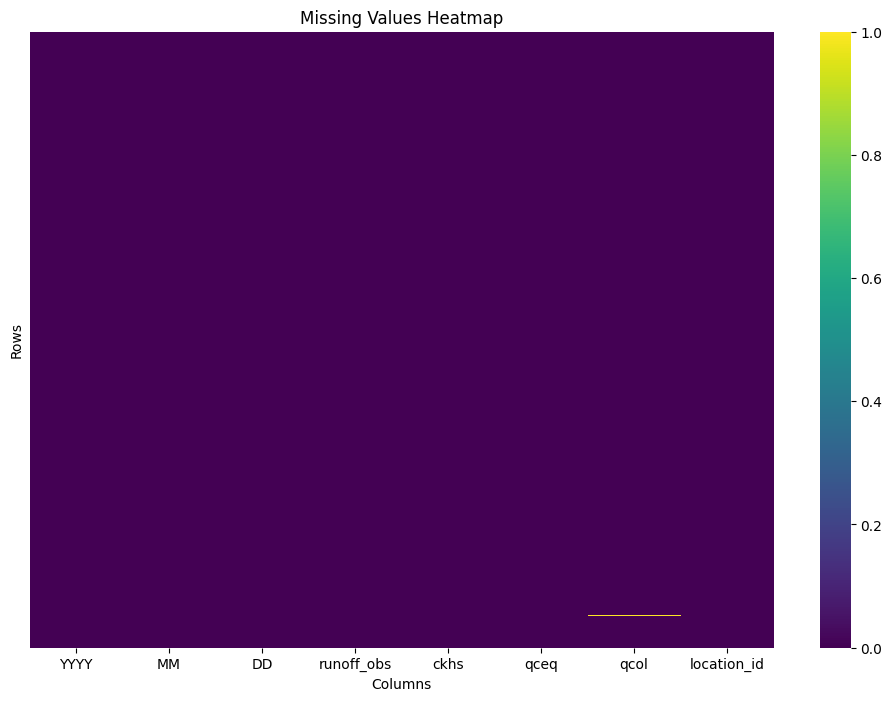

In [5]:
plot_missing_values(df_raw)

### Discussion: Missing Values

**Key Observations:**
- Identify which columns have missing values
- Determine if missing values follow patterns (e.g., specific time periods, locations)
- Assess whether missing values are:
  - Missing Completely at Random (MCAR)
  - Missing at Random (MAR)
  - Missing Not at Random (MNAR)
- Consider domain knowledge: are certain measurements expected to be missing?

**Implications:**
- High percentage of missing values may require careful imputation or column removal
- Missing patterns may indicate data collection issues

## Step 3: Statistical Analysis

Basic statistical analysis including distributions, correlations, and outlier detection.

### 3.1 Distributions

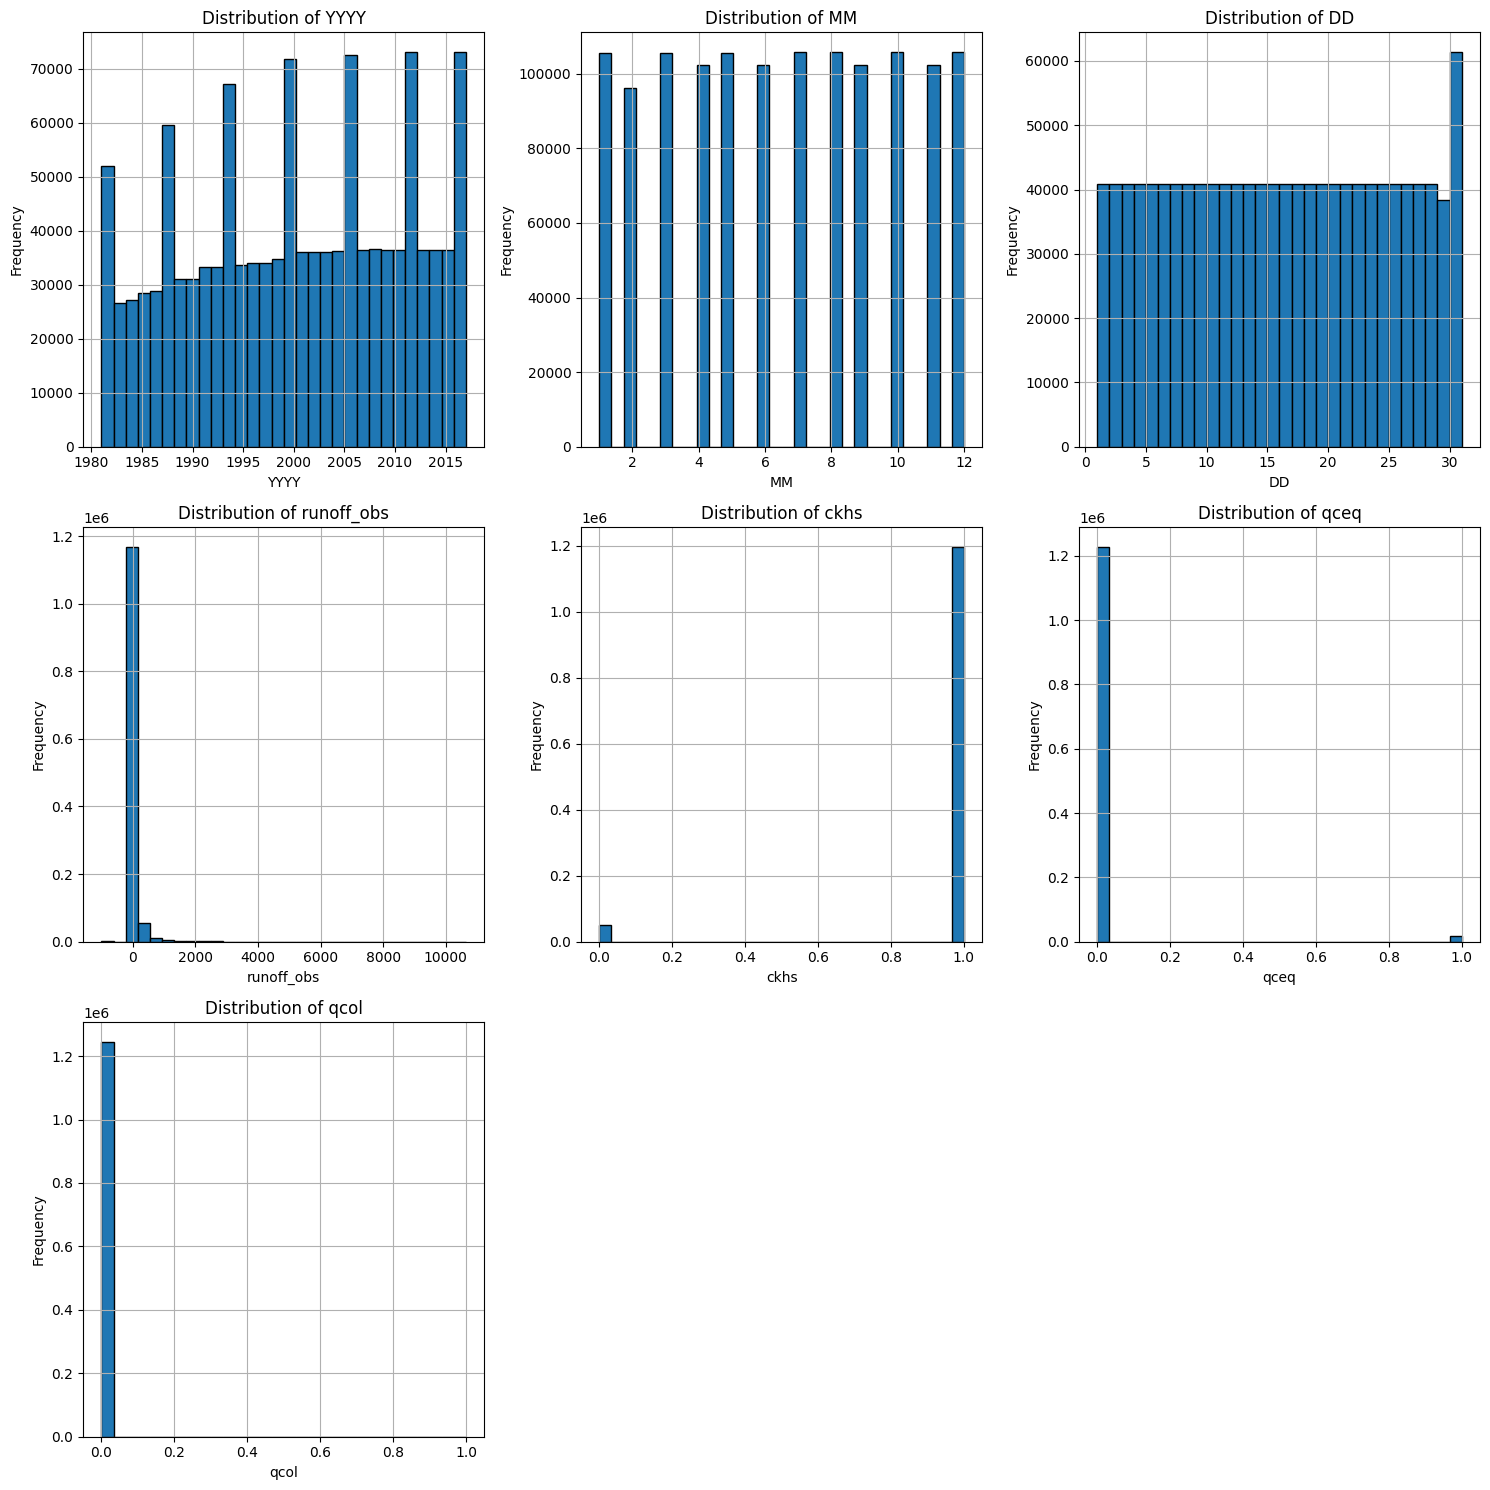

In [6]:
# Distribution of all numeric variables
plot_distribution_grid(df_raw)

### 3.2 Outlier Detection

In [7]:
outliers = detect_outliers(df_raw, method='iqr', threshold=1.5)

YYYY: 0 outliers (0.00%)
MM: 0 outliers (0.00%)
DD: 0 outliers (0.00%)
runoff_obs: 202918 outliers (16.29%)
ckhs: 49703 outliers (3.99%)
qceq: 18333 outliers (1.47%)
qcol: 58 outliers (0.00%)


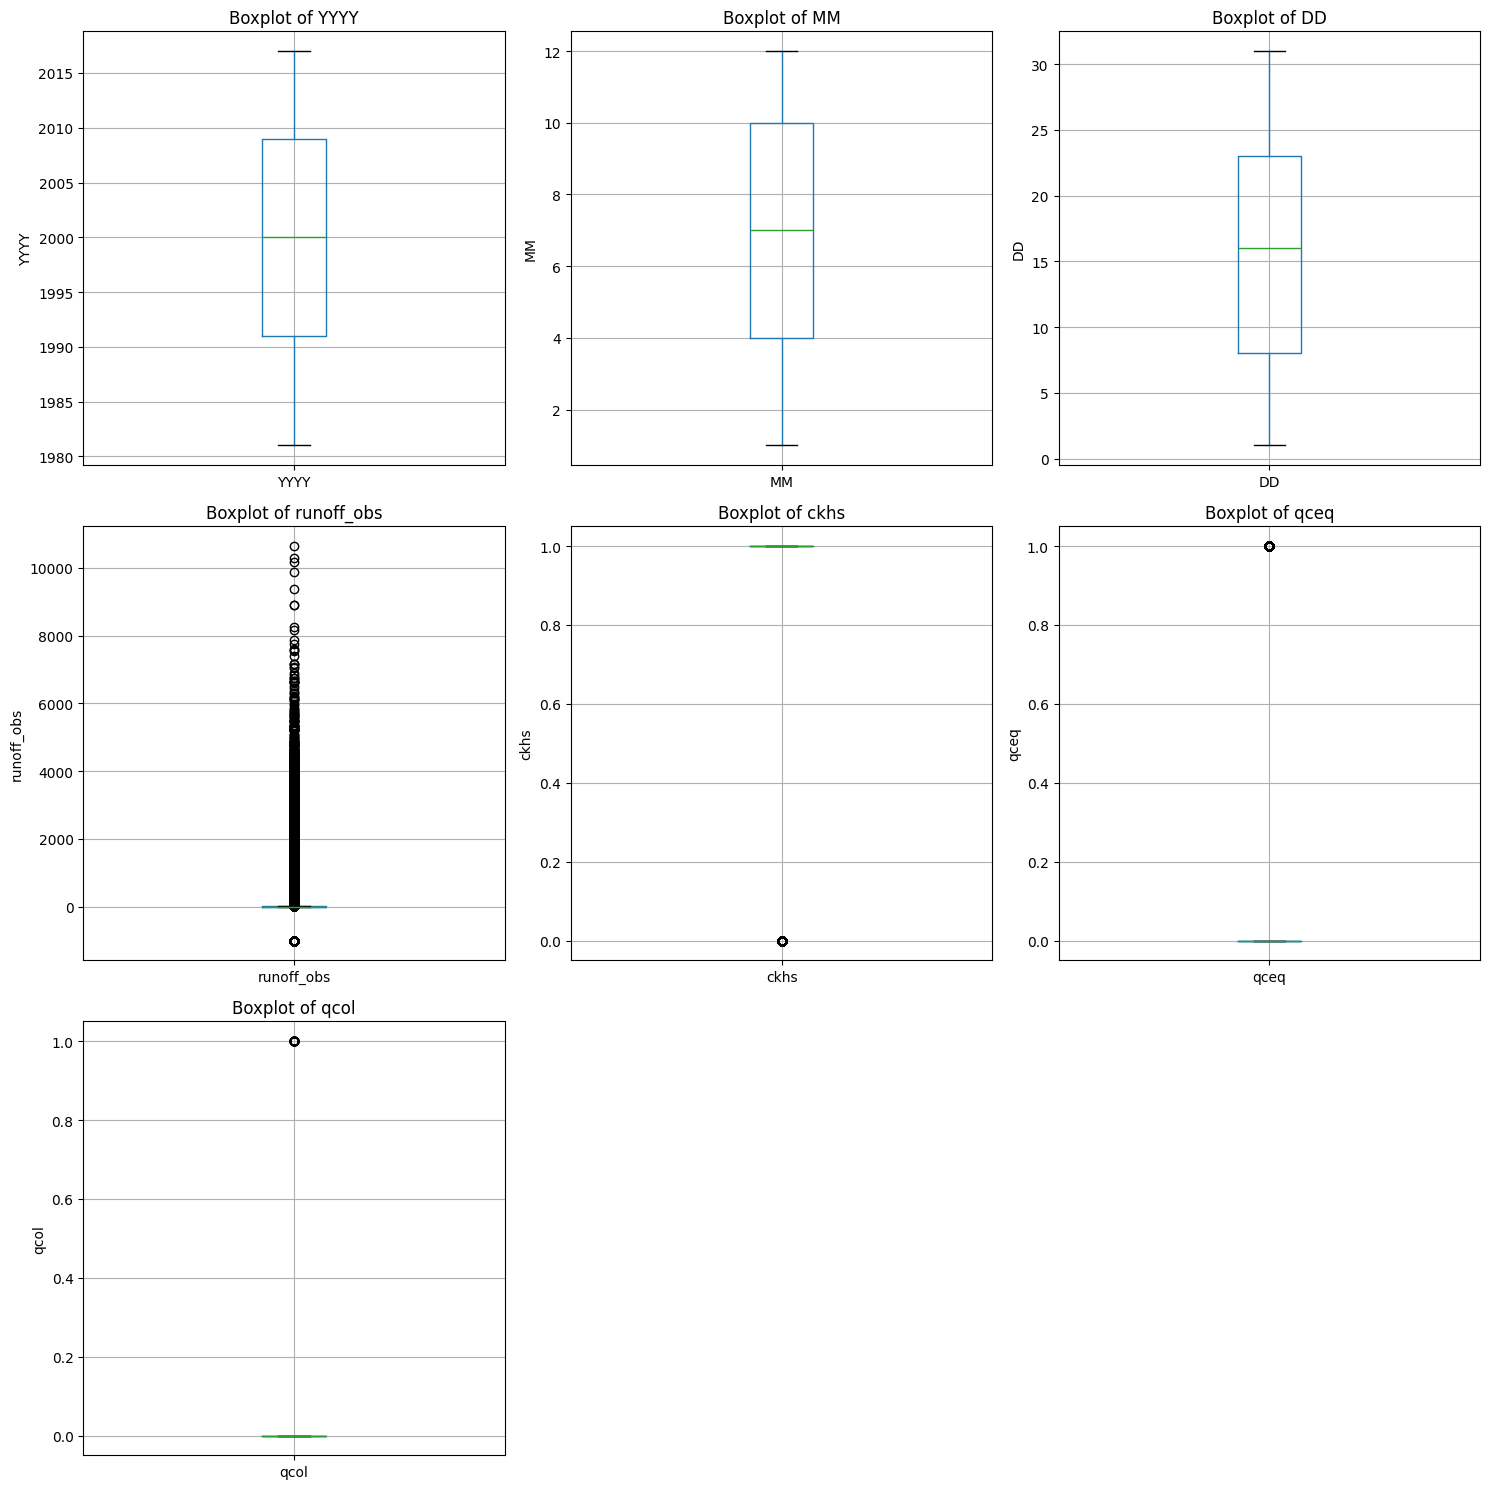

In [8]:
# Visualize outliers with boxplots
plot_boxplot_grid(df_raw)

### 3.3 Correlation Analysis

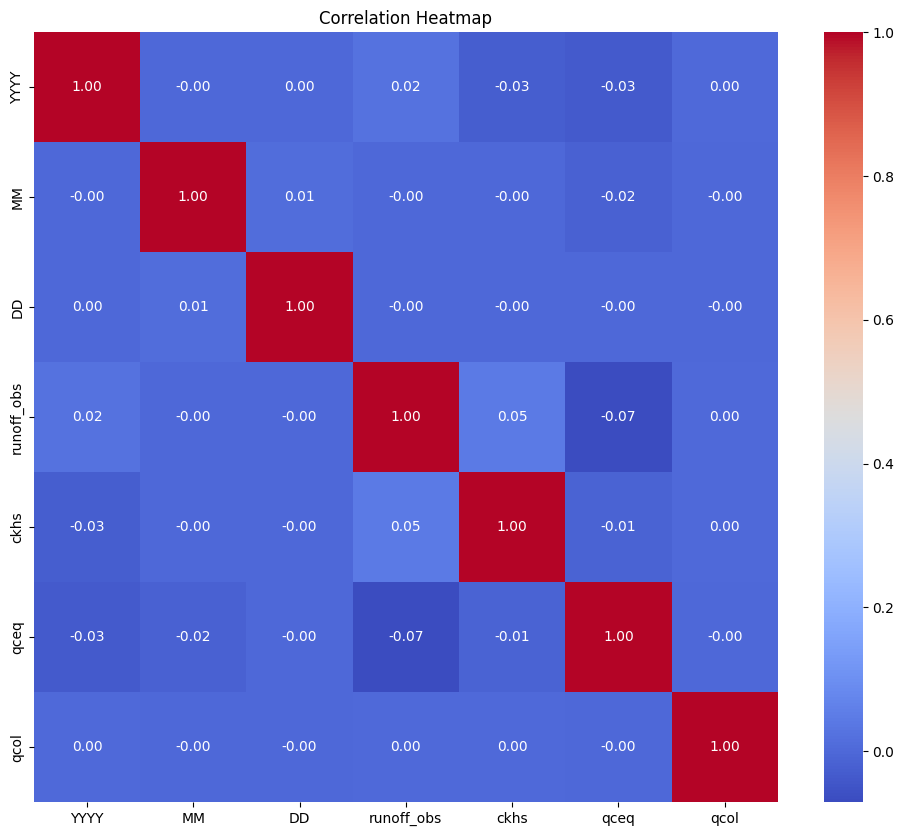

In [9]:
plot_correlation_heatmap(df_raw)

### 3.4 Time Series Analysis

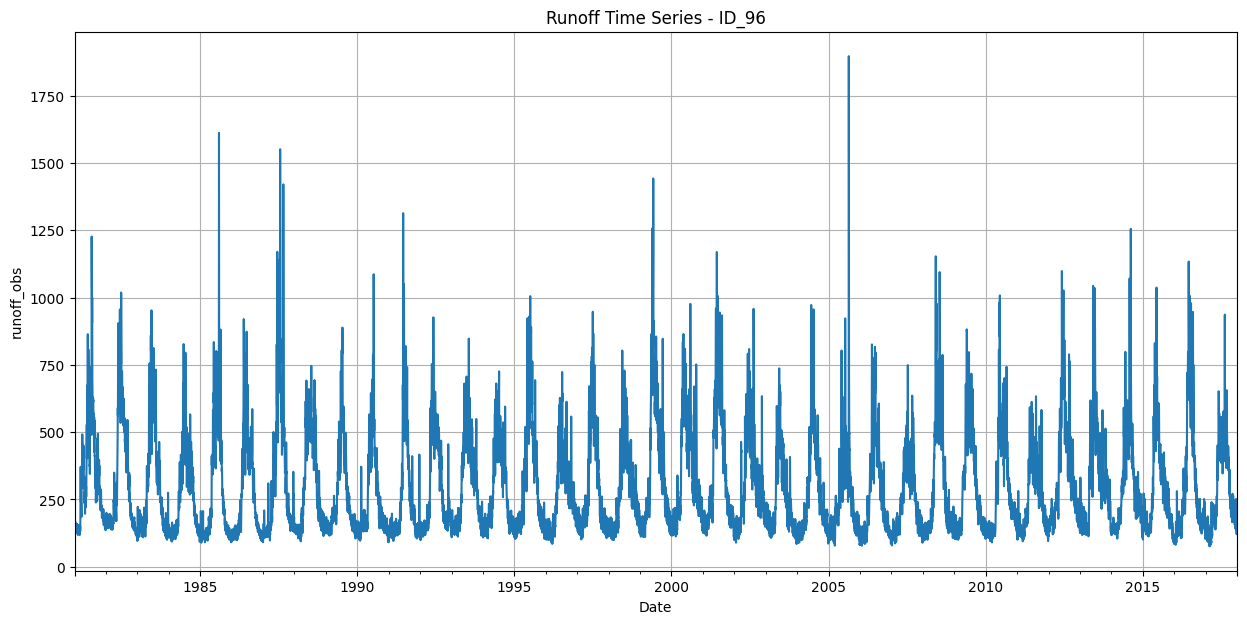

In [10]:
# Single location time series
first_location = df_raw['location_id'].unique()[0]
df_single = df_raw[df_raw['location_id'] == first_location]
plot_time_series(df_single, 'runoff_obs', title=f'Runoff Time Series - {first_location}')

### Statistical Summary Table

In [11]:
# Summary statistics
summary_stats = df_raw.describe().T
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
summary_stats['iqr'] = summary_stats['75%'] - summary_stats['25%']
summary_stats

,count,mean,std,min,25%,50%,75%,max,range,iqr
YYYY,1245564.0,1999.994620,10.425709,1981.0,1991.000,2000.000,2009.000,2017.000,36.000,18.000
MM,1245564.0,6.525099,3.448910,1.0,4.000,7.000,10.000,12.000,11.000,6.000
DD,1245564.0,15.729619,8.800070,1.0,8.000,16.000,23.000,31.000,30.000,15.000
runoff_obs,1245564.0,44.288278,202.799384,-999.0,0.671,2.776,11.767,10643.208,11642.208,11.096
ckhs,1245564.0,0.960096,0.195734,0.0,1.000,1.000,1.000,1.000,1.000,0.000
qceq,1245564.0,0.014719,0.120424,0.0,0.000,0.000,0.000,1.000,1.000,0.000
qcol,1244143.0,0.000047,0.006828,0.0,0.000,0.000,0.000,1.000,1.000,0.000


## Step 4: Data Preprocessing

Impute missing values and transform/normalize data as needed.

### 4.1 Handle Missing Values

In [12]:
# Impute missing values for runoff_obs using interpolation (appropriate for time series)
df_imputed = impute_missing_values(
    df_raw,
    strategy='interpolate',
    columns=['runoff_obs', 'qcol']
)

print(f"\nMissing values after imputation:")
print(df_imputed.isnull().sum())

qcol: Imputed 1421 values with interpolation

Missing values after imputation:
YYYY           0
MM             0
DD             0
runoff_obs     0
ckhs           0
qceq           0
qcol           0
location_id    0
dtype: int64


### 4.2 Handle Invalid Values

The data contains -999 as a placeholder for missing values.
Let's replace these with NaN and re-impute.

In [13]:
# Replace -999 with NaN
df_clean = df_imputed.copy()
df_clean['runoff_obs'] = df_clean['runoff_obs'].replace(-999, np.nan)

print(f"Values equal to -999: {(df_raw['runoff_obs'] == -999).sum()}")
print(f"Missing values after replacing -999: {df_clean['runoff_obs'].isnull().sum()}")

# Re-impute
df_clean = impute_missing_values(df_clean, strategy='interpolate', columns=['runoff_obs'])

Values equal to -999: 1421
Missing values after replacing -999: 1421
runoff_obs: Imputed 1421 values with interpolation


### 4.3 Handle Duplicates

In [14]:
df_clean = handle_duplicates(df_clean)

Removed 0 duplicate rows (0.00%).


### 4.4 Data Normalization

Normalize numerical features for model training.

In [15]:
# Select features to normalize (excluding date components and IDs)
features_to_normalize = ['runoff_obs', 'qcol']

df_normalized, scaler = normalize_data(
    df_clean,
    method='standard',
    columns=features_to_normalize
)

print("\nNormalized data statistics:")
df_normalized[features_to_normalize].describe()

Normalized 2 columns using standard scaling.

Normalized data statistics:


,runoff_obs,qcol
count,1.245564e+06,1.245564e+06
mean,2.336599e-17,3.650935e-19
std,1.000000e+00,1.000000e+00
min,-2.275194e-01,-6.824032e-03
25%,-2.241346e-01,-6.824032e-03
50%,-2.135747e-01,-6.824032e-03
75%,-1.684556e-01,-6.824032e-03
max,5.306416e+01,1.465409e+02


### 4.5 Alternative: Complete Preprocessing Pipeline

In [16]:
# Example of using the preprocessing pipeline
preprocessing_steps = [
    ('handle_duplicates', handle_duplicates, {'keep': 'first'}),
    ('impute_missing', impute_missing_values, {'strategy': 'interpolate', 'columns': ['runoff_obs', 'qcol']}),
    ('normalize', normalize_data, {'method': 'standard', 'columns': ['runoff_obs', 'qcol']}),
]

# Uncomment to run the pipeline
# df_processed = create_preprocessing_pipeline(df_raw, preprocessing_steps)

## Step 5: Data Quality & Engineering Discussion

Understanding data quality is critical before model training.

### 5.1 Comprehensive Data Quality Assessment

In [17]:
quality_report = assess_data_quality(df_raw)

DATA QUALITY ASSESSMENT REPORT

Dataset Dimensions             1,245,564 rows × 8 columns
Total Cells                    9,964,512

COMPLETENESS                  
Missing Cells                  1,421 (0.01%)
Completeness Score             99.99%

UNIQUENESS                    
Duplicate Rows                 0 (0.00%)
Uniqueness Score               100.00%

DATA TYPES                    
Numeric Columns                7
Categorical Columns            1
Datetime Columns               0


In [18]:
quality_summary = generate_data_quality_summary(df_raw)
quality_summary

,Column,Data_Type,Missing_Count,Missing_Pct,Unique_Values,Min,Max,Mean,Std
0,YYYY,int64,0,0.000000,37,1981.0,2017.000,1999.994620,10.425709
1,MM,int64,0,0.000000,12,1.0,12.000,6.525099,3.448910
2,DD,int64,0,0.000000,31,1.0,31.000,15.729619,8.800070
3,runoff_obs,float64,0,0.000000,109473,-999.0,10643.208,44.288278,202.799384
4,ckhs,int64,0,0.000000,2,0.0,1.000,0.960096,0.195734
5,qceq,int64,0,0.000000,2,0.0,1.000,0.014719,0.120424
6,qcol,float64,1421,0.114085,2,0.0,1.000,0.000047,0.006828
7,location_id,object,0,0.000000,100,NaN,NaN,NaN,NaN


### 5.2 Data Consistency Checks

In [19]:
# Define validation rules based on domain knowledge
validation_rules = {
    'runoff_obs': {'min': -999, 'max': 10000},  # -999 is placeholder for missing
    'MM': {'min': 1, 'max': 12},
    'DD': {'min': 1, 'max': 31},
}

violations = check_data_consistency(df_raw, column_rules=validation_rules)

runoff_obs: 3 values > 10000


### 5.3 Discussion: Importance of Data Quality

**Why Data Quality Matters:**

1. **Garbage In, Garbage Out (GIGO)**
   - Poor quality data leads to unreliable models
   - Model performance is bounded by data quality

2. **Common Data Quality Issues:**
   - Missing values (seen in our dataset)
   - Outliers and anomalies (detected in runoff_obs)
   - Invalid placeholder values (-999 in runoff_obs)
   - Duplicate records
   - Inconsistent formats or units
   - Data drift over time

3. **Impact on Model Training:**
   - Missing values can lead to biased models or training failures
   - Outliers can skew learning algorithms
   - Invalid values can introduce noise and reduce accuracy
   - Imbalanced data can lead to biased predictions

4. **Data Engineering Best Practices:**
   - Always explore and profile data before modeling
   - Document data quality issues and preprocessing decisions
   - Use domain knowledge to validate data ranges and relationships
   - Implement reproducible preprocessing pipelines
   - Track data provenance and transformations
   - Monitor data quality over time

5. **LamaH Dataset Specific Findings:**
   - Placeholder value -999 for missing runoff observations
   - Some missing values in quality check columns (qcol)
   - Heavily skewed distribution of runoff_obs (needs transformation)
   - Multiple locations with varying data characteristics

6. **Recommendations:**
   - Replace -999 with NaN and impute using time-series methods
   - Consider log transformation for runoff_obs due to skewness
   - Handle each location separately if modeling per-location
   - Use robust scaling to handle outliers
   - Validate temporal continuity in time series data

### 5.4 Before vs After Preprocessing Comparison

In [20]:
print("BEFORE PREPROCESSING:")
print("=" * 50)
print(f"Shape: {df_raw.shape}")
print(f"Missing values: {df_raw.isnull().sum().sum()}")
print(f"Duplicate rows: {df_raw.duplicated().sum()}")
print(f"Invalid values (-999): {(df_raw['runoff_obs'] == -999).sum()}")
print("\nAFTER PREPROCESSING:")
print("=" * 50)
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Duplicate rows: {df_clean.duplicated().sum()}")
print(f"Invalid values (-999): {(df_clean['runoff_obs'] == -999).sum()}")

BEFORE PREPROCESSING:
Shape: (1245564, 8)
Missing values: 1421
Duplicate rows: 0
Invalid values (-999): 1421

AFTER PREPROCESSING:
Shape: (1245564, 8)
Missing values: 0
Duplicate rows: 0
Invalid values (-999): 0


## Summary

This notebook demonstrated a comprehensive data analysis workflow:

1. ✅ **Data Loading**: Loaded 100 random locations with reproducible seed
2. ✅ **Null Value Analysis**: Identified and analyzed missing values
3. ✅ **Statistical Analysis**: Examined distributions, correlations, and outliers
4. ✅ **Data Preprocessing**: Imputed missing values, handled invalid data, normalized features
5. ✅ **Data Quality Discussion**: Assessed quality metrics and discussed implications

The dataset is now ready for model training with improved quality and consistency.